In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    "resimler/",
    target_size=(32,32)
    )

Found 600 images belonging to 3 classes.


In [4]:
model  = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 1,639,427
Trainable params: 1,639,427
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [7]:
model.fit(train_generator,epochs=10,batch_size=4,verbose=1)

Epoch 1/10
19/19 [==============================] - 29s 1s/step - loss: 1.3511 - accuracy: 0.4533
Epoch 2/10
19/19 [==============================] - 25s 1s/step - loss: 0.6693 - accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 25s 1s/step - loss: 0.3509 - accuracy: 0.8917
Epoch 4/10
19/19 [==============================] - 22s 1s/step - loss: 0.2424 - accuracy: 0.9100
Epoch 5/10
19/19 [==============================] - 23s 1s/step - loss: 0.1380 - accuracy: 0.9567
Epoch 6/10
19/19 [==============================] - 26s 1s/step - loss: 0.1146 - accuracy: 0.9600
Epoch 7/10
19/19 [==============================] - 25s 1s/step - loss: 0.0492 - accuracy: 0.9950
Epoch 8/10
19/19 [==============================] - 27s 1s/step - loss: 0.0280 - accuracy: 0.9983
Epoch 9/10
19/19 [==============================] - 27s 1s/step - loss: 0.0220 - accuracy: 0.9983
Epoch 10/10
19/19 [==============================] - 22s 1s/step - loss: 0.0134 - accuracy: 1.0000


In [9]:
model.save('data/ozellestirilmis_model.h5')

In [31]:
from tensorflow.keras.models import  load_model
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "test.jpg"
img = image.load_img(img_path,target_size=(32,32))
img_array = image.img_to_array(img)

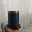

In [32]:
img

In [33]:
img_array

array([[[189., 186., 181.],
        [197., 197., 189.],
        [200., 197., 190.],
        ...,
        [206., 203., 194.],
        [217., 212., 206.],
        [216., 213., 204.]],

       [[188., 188., 180.],
        [197., 194., 187.],
        [202., 199., 192.],
        ...,
        [210., 207., 198.],
        [219., 216., 209.],
        [217., 214., 205.]],

       [[189., 186., 177.],
        [196., 193., 186.],
        [201., 198., 191.],
        ...,
        [211., 208., 201.],
        [221., 218., 211.],
        [218., 215., 208.]],

       ...,

       [[129., 125., 124.],
        [131., 130., 128.],
        [ 67.,  63.,  60.],
        ...,
        [141., 138., 129.],
        [145., 141., 130.],
        [146., 142., 131.]],

       [[122., 121., 119.],
        [130., 129., 125.],
        [ 66.,  63.,  58.],
        ...,
        [156., 153., 146.],
        [161., 156., 150.],
        [158., 155., 148.]],

       [[105., 106., 100.],
        [125., 124., 119.],
        [ 63.,  

In [34]:
img_array = np.expand_dims(img_array,axis=0)
img_array

array([[[[189., 186., 181.],
         [197., 197., 189.],
         [200., 197., 190.],
         ...,
         [206., 203., 194.],
         [217., 212., 206.],
         [216., 213., 204.]],

        [[188., 188., 180.],
         [197., 194., 187.],
         [202., 199., 192.],
         ...,
         [210., 207., 198.],
         [219., 216., 209.],
         [217., 214., 205.]],

        [[189., 186., 177.],
         [196., 193., 186.],
         [201., 198., 191.],
         ...,
         [211., 208., 201.],
         [221., 218., 211.],
         [218., 215., 208.]],

        ...,

        [[129., 125., 124.],
         [131., 130., 128.],
         [ 67.,  63.,  60.],
         ...,
         [141., 138., 129.],
         [145., 141., 130.],
         [146., 142., 131.]],

        [[122., 121., 119.],
         [130., 129., 125.],
         [ 66.,  63.,  58.],
         ...,
         [156., 153., 146.],
         [161., 156., 150.],
         [158., 155., 148.]],

        [[105., 106., 100.],
       

In [35]:
img_array /= 255.0
img_array

array([[[[0.7411765 , 0.7294118 , 0.70980394],
         [0.77254903, 0.77254903, 0.7411765 ],
         [0.78431374, 0.77254903, 0.74509805],
         ...,
         [0.80784315, 0.79607844, 0.7607843 ],
         [0.8509804 , 0.83137256, 0.80784315],
         [0.84705883, 0.8352941 , 0.8       ]],

        [[0.7372549 , 0.7372549 , 0.7058824 ],
         [0.77254903, 0.7607843 , 0.73333335],
         [0.7921569 , 0.78039217, 0.7529412 ],
         ...,
         [0.8235294 , 0.8117647 , 0.7764706 ],
         [0.85882354, 0.84705883, 0.81960785],
         [0.8509804 , 0.8392157 , 0.8039216 ]],

        [[0.7411765 , 0.7294118 , 0.69411767],
         [0.76862746, 0.75686276, 0.7294118 ],
         [0.7882353 , 0.7764706 , 0.7490196 ],
         ...,
         [0.827451  , 0.8156863 , 0.7882353 ],
         [0.8666667 , 0.85490197, 0.827451  ],
         [0.85490197, 0.84313726, 0.8156863 ]],

        ...,

        [[0.5058824 , 0.49019608, 0.4862745 ],
         [0.5137255 , 0.50980395, 0.5019608 ]

In [36]:
loaded_model = load_model('data/ozellestirilmis_model.h5')
pred = loaded_model(img_array)
pred

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[5.1929085e-08, 2.7061506e-06, 9.9999726e-01]], dtype=float32)>

In [37]:
np.argmax(pred)

2

In [38]:
class_labels = ["bardak","deodorant", "termos"] 
class_labels[np.argmax(pred)]

'termos'

In [39]:
class_labels = ["bardak","deodorant", "termos"] 
predicted_class_index = np.argmax(pred)
predicted_class_label = class_labels[predicted_class_index]

print("Tahmin sonuclari:", pred)
print("En yuksek tahmin:", predicted_class_label)

Tahmin sonuclari: tf.Tensor([[5.1929085e-08 2.7061506e-06 9.9999726e-01]], shape=(1, 3), dtype=float32)
En yuksek tahmin: termos
